In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Grafy k prvnímu projektu

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

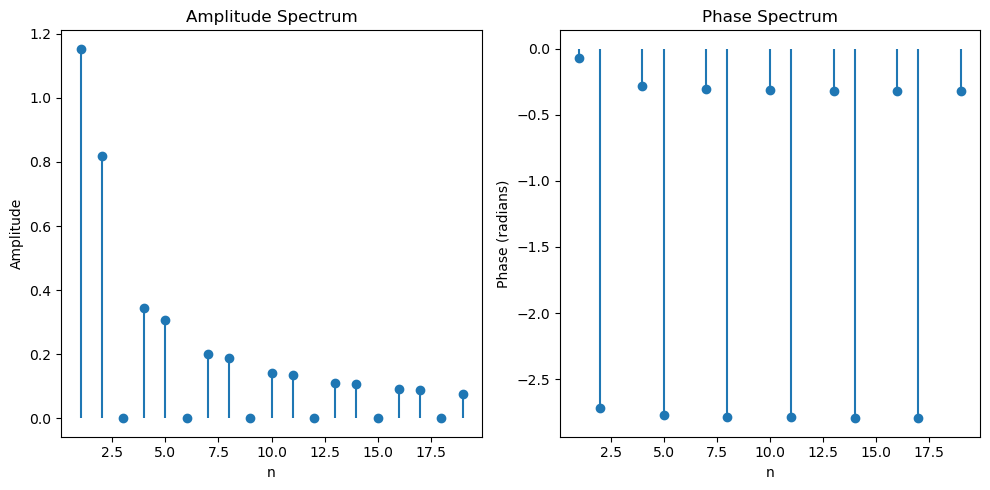

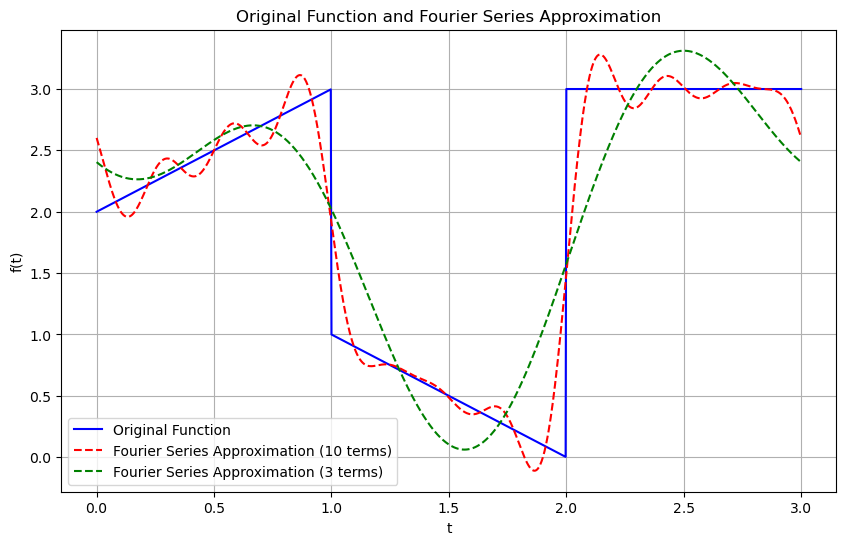

In [12]:
t = sp.symbols('t')
L = 3  

f = sp.Piecewise((t + 2, (t >= 0) & (t < 1)),
                 (2 - t, (t >= 1) & (t < 2)),
                 (3, (t >= 2) & (t < 3)))

# Fourier coefficients
a0 = (2 / L) * sp.integrate(f, (t, 0, L))
an = lambda n: (2 / L) * sp.integrate(f * sp.cos(2 * sp.pi * n * t / L), (t, 0, L))
bn = lambda n: (2 / L) * sp.integrate(f * sp.sin(2 * sp.pi * n * t / L), (t, 0, L))


n = sp.symbols('n', integer=True)
display(Math( sp.latex(sp.simplify(an(n)))) )
display(Math( sp.latex(sp.simplify(bn(n)))) )


for n_val in range(1, 6):
    an_val = an(n_val)
    bn_val = bn(n_val)
    display(Math(f"a_{n_val} = {sp.latex(an_val.evalf())}"))
    display(Math(f"b_{n_val} = {sp.latex(bn_val.evalf())}"))
    
    amplitude = sp.sqrt(an_val**2 + bn_val**2)
    phase = sp.atan2(bn_val, an_val)

    display(Math(f"A_{n_val}: {sp.latex(amplitude.evalf())}"))
    display(Math(f"phi_{n_val}: {sp.latex(phase.evalf())}"))

amplitudes = []
phases = []
for n_val in range(1, 20):
    an_val = an(n_val)
    bn_val = bn(n_val)
    amplitude = sp.sqrt(an_val**2 + bn_val**2)
    phase = sp.atan2(bn_val, an_val)
    
    amplitudes.append(amplitude)
    phases.append(phase)

amplitudes_numeric = [float(amplitude.evalf()) for amplitude in amplitudes]
phases_numeric = [float(phase.evalf()) for phase in phases]

# Plotting the amplitude and phase spectra
n_values = np.arange(1, 20)

plt.figure(figsize=(10, 5))

# Plot amplitude spectrum
plt.subplot(1, 2, 1)
plt.stem(n_values, amplitudes_numeric, basefmt=" ", use_line_collection=True)
plt.title("Amplitude Spectrum")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot phase spectrum
plt.subplot(1, 2, 2)
plt.stem(n_values, phases_numeric, basefmt=" ", use_line_collection=True)
plt.title("Phase Spectrum")
plt.xlabel("n")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()

def fourier_series_approx(n_terms, t_vals):
    sum_series = np.zeros_like(t_vals)
    for n_val in range(1, n_terms + 1):
        an_val = float(an(n_val).evalf())
        bn_val = float(bn(n_val).evalf())
        sum_series += an_val * np.cos(2 * np.pi * n_val * t_vals / L) + bn_val * np.sin(2 * np.pi * n_val * t_vals / L)
    sum_series += float(a0) / 2  
    return sum_series

t_vals = np.linspace(0, L, 1000)
f_vals = np.piecewise(t_vals, [t_vals < 1, (t_vals >= 1) & (t_vals < 2), t_vals >= 2], [lambda t: t + 2, lambda t: 2 - t, 3])

fourier_approx_vals = fourier_series_approx(10, t_vals)
fourier_approx_vals3 = fourier_series_approx(3, t_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, f_vals, label='Original Function', color='b')
plt.plot(t_vals, fourier_approx_vals, label='Fourier Series Approximation (10 terms)', color='r', linestyle='--')
plt.plot(t_vals, fourier_approx_vals3, label='Fourier Series Approximation (3 terms)', color='g', linestyle='--')
plt.title('Original Function and Fourier Series Approximation')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

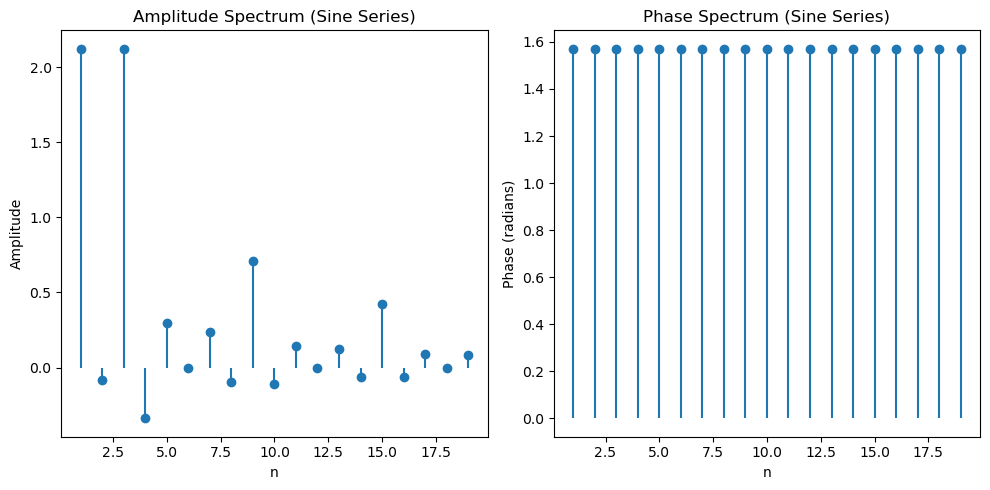

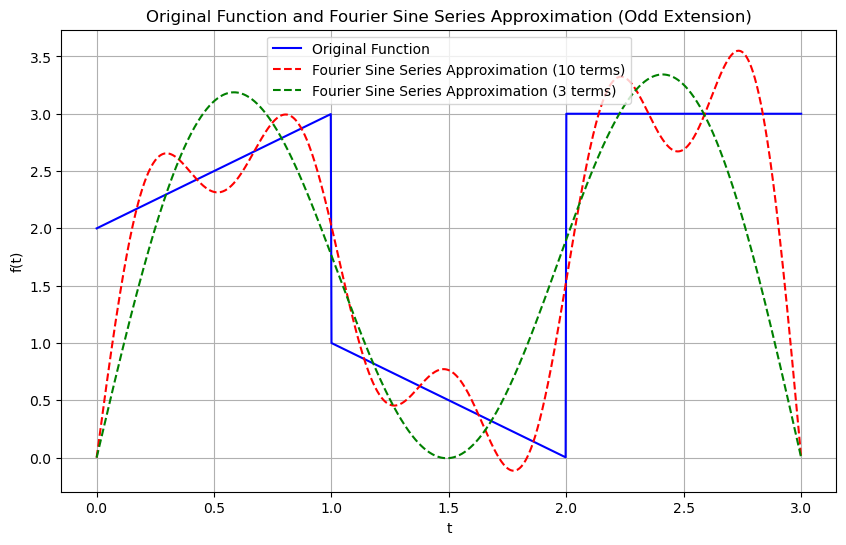

In [13]:
t = sp.symbols('t')
L = 3  

f = sp.Piecewise((t + 2, (t >= 0) & (t < 1)),
                 (2 - t, (t >= 1) & (t < 2)),
                 (3, (t >= 2) & (t < 3)))


bn = lambda n: (2 / L) * sp.integrate(f * sp.sin(n * sp.pi * t / L), (t, 0, L))

n = sp.symbols('n', integer=True)
display(Math( sp.latex(sp.simplify(bn(n)))) )



for n_val in range(1, 6):
    bn_val = bn(n_val)
    display(Math(f"b_{n_val} = {sp.latex(bn_val.evalf())}"))



amplitudes = []
phases = []
for n_val in range(1, 20):
    bn_val = bn(n_val)
    amplitude = float(bn_val.evalf())
    phase = np.pi / 2 
    
    amplitudes.append(amplitude)
    phases.append(phase)


# Convert amplitudes and phases to numeric values for plotting
amplitudes_numeric = [float(amplitude) for amplitude in amplitudes]
phases_numeric = [float(phase) for phase in phases]


n_values = np.arange(1, 20)
plt.figure(figsize=(10, 5))

# Plot amplitude spectrum
plt.subplot(1, 2, 1)
plt.stem(n_values, amplitudes_numeric, basefmt=" ", use_line_collection=True)
plt.title("Amplitude Spectrum (Sine Series)")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot phase spectrum
plt.subplot(1, 2, 2)
plt.stem(n_values, phases_numeric, basefmt=" ", use_line_collection=True)
plt.title("Phase Spectrum (Sine Series)")
plt.xlabel("n")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()




def fourier_sine_series_approx(n_terms, t_vals):
    sum_series = np.zeros_like(t_vals)
    for n_val in range(1, n_terms + 1):
        bn_val = float(bn(n_val).evalf())
        sum_series += bn_val * np.sin(n_val * np.pi * t_vals / L)
    return sum_series

t_vals = np.linspace(0, L, 1000)
f_vals = np.piecewise(t_vals, [t_vals < 1, (t_vals >= 1) & (t_vals < 2), t_vals >= 2], [lambda t: t + 2, lambda t: 2 - t, 3])

fourier_sine_approx_vals = fourier_sine_series_approx(10, t_vals)
fourier_sine_approx_vals3 = fourier_sine_series_approx(3, t_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, f_vals, label='Original Function', color='b')
plt.plot(t_vals, fourier_sine_approx_vals, label='Fourier Sine Series Approximation (10 terms)', color='r', linestyle='--')
plt.plot(t_vals, fourier_sine_approx_vals3, label='Fourier Sine Series Approximation (3 terms)', color='g', linestyle='--')
plt.title('Original Function and Fourier Sine Series Approximation (Odd Extension)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

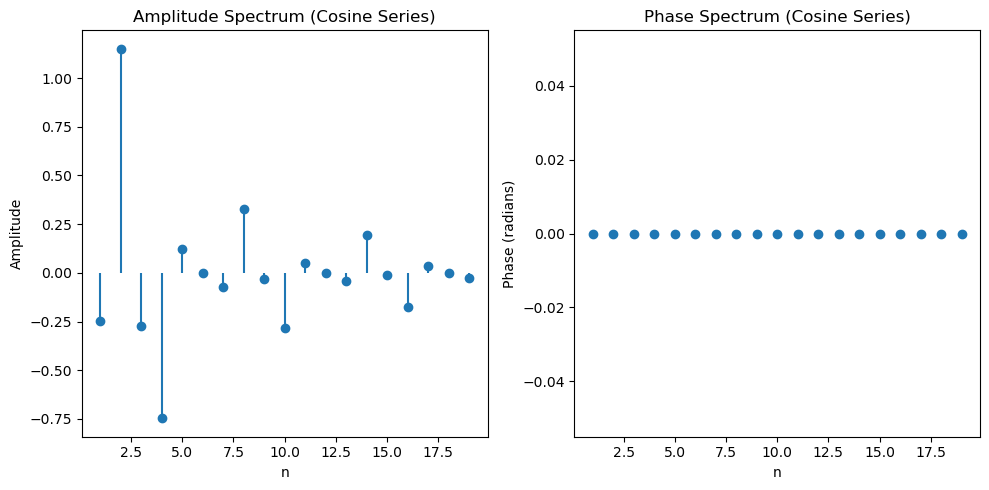

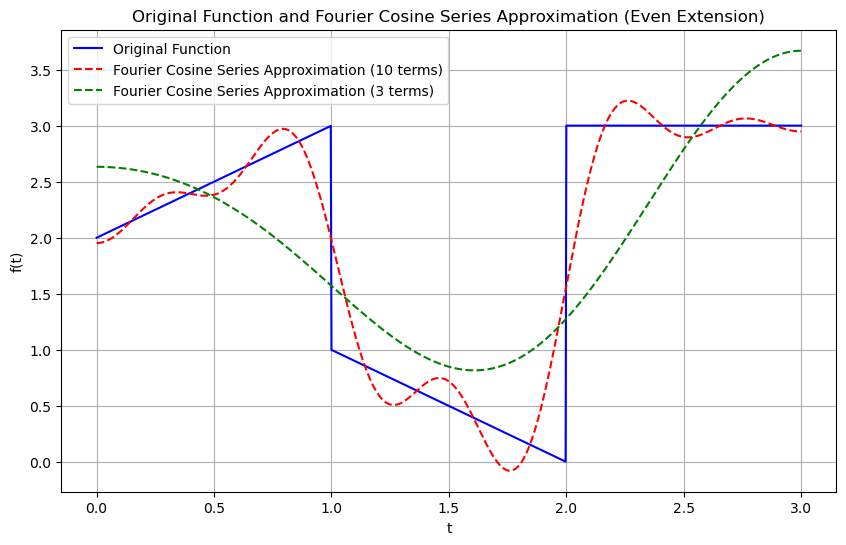

In [ ]:
t = sp.symbols('t')
L = 3 

f = sp.Piecewise((t + 2, (t >= 0) & (t < 1)),
                 (2 - t, (t >= 1) & (t < 2)),
                 (3, (t >= 2) & (t < 3)))


a0 = (2 / L) * sp.integrate(f, (t, 0, L))
an = lambda n: (2 / L) * sp.integrate(f * sp.cos(n * sp.pi * t / L), (t, 0, L))

n = sp.symbols('n', integer=True)
display(Math( sp.latex(sp.simplify(an(n)))) )
display(Math(f"a_0 = {sp.latex(a0.evalf())}"))


for n_val in range(1, 6):
    an_val = an(n_val)
    display(Math(f"a_{n_val} = {sp.latex(an_val.evalf())}"))


amplitudes = []
phases = []
for n_val in range(1, 20):
    an_val = an(n_val)
    amplitude = float(an_val.evalf())
    phase = 0  
    
    amplitudes.append(amplitude)
    phases.append(phase)



# Convert amplitudes and phases to numeric values for plotting
amplitudes_numeric = [float(amplitude) for amplitude in amplitudes]
phases_numeric = [float(phase) for phase in phases]



n_values = np.arange(1, 20)
plt.figure(figsize=(10, 5))

# Plot amplitude spectrum
plt.subplot(1, 2, 1)
plt.stem(n_values, amplitudes_numeric, basefmt=" ", use_line_collection=True)
plt.title("Amplitude Spectrum (Cosine Series)")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Plot phase spectrum
plt.subplot(1, 2, 2)
plt.stem(n_values, phases_numeric, basefmt=" ", use_line_collection=True)
plt.title("Phase Spectrum (Cosine Series)")
plt.xlabel("n")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()



def fourier_cosine_series_approx(n_terms, t_vals):

    sum_series = np.zeros_like(t_vals)
    sum_series += float(a0.evalf()) / 2  

    for n_val in range(1, n_terms + 1):
        an_val = float(an(n_val).evalf())
        sum_series += an_val * np.cos(n_val * np.pi * t_vals / L)
    return sum_series

t_vals = np.linspace(0, L, 1000)
f_vals = np.piecewise(t_vals, [t_vals < 1, (t_vals >= 1) & (t_vals < 2), t_vals >= 2], [lambda t: t + 2, lambda t: 2 - t, 3])

fourier_cosine_approx_vals = fourier_cosine_series_approx(10, t_vals)
fourier_cosine_approx_vals3 = fourier_cosine_series_approx(3, t_vals)
plt.plot(t_vals, fourier_cosine_approx_vals3, label='Fourier Cosine Series Approximation (3 terms)', color='g', linestyle='--')

plt.figure(figsize=(10, 6))
plt.plot(t_vals, f_vals, label='Original Function', color='b')
plt.plot(t_vals, fourier_cosine_approx_vals, label='Fourier Cosine Series Approximation (10 terms)', color='r', linestyle='--')
plt.title('Original Function and Fourier Cosine Series Approximation (Even Extension)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()


Úkol č. 2:
----------
* namodelujte signál nebo použijte Váš reálný
* vyberte si 3 okenní funkce a realizujte okenní Fourierovu transformaci, vyktreslete příslušná
  časově-frekvenční spektra a okomentujte grafy
* proveďte vyhlazení Vašeho (možno v časové oblasti zašuměného) signálu pomocí konvoluce s 
  těmito okny a analyzujte vliv šířky okna a posuvu na vyhlazení - k vyhodnocení použijte 
  amlpitudového spektra získaného pomocí fft
* zobecněte implementaci pro obecný posun okna, použijte funkce interp k požadované interpolaci
  matice koeficientů na odpovídající délku signálu

In [11]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def stft_custom(signal, window_func, window_size, hop_length):
    n_frames = 1 + (len(signal) - window_size) // hop_length
    stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

    for i in range(n_frames):
        
        frame = signal[i * hop_length: i * hop_length + window_size]

        if len(frame) < window_size: 
            frame = np.pad(frame, (0, window_size - len(frame)))

        windowed_frame = frame * window_func(window_size)
        stft_matrix[:, i] = np.fft.rfft(windowed_frame)

    return stft_matrix

In [13]:
def kaiser(size):
    return np.kaiser(size, beta=5)

In [14]:
def gaussian(size):
    return np.exp(-0.5 * (np.arange(size) - size//2)**2 / (0.4 * size)**2)

In [15]:
def rectangle_window(size):
    return np.ones(size)

In [16]:
def hamming_window(size):
    return np.hamming(size)


In [17]:
def triangle_window(size):
    return np.bartlett(size)

In [ ]:

def smooth_signal(signal, window_func, window_size, hop_length):
    
    window = window_func(window_size)
    smoothed_signal = np.convolve(signal, window / window.sum(), mode="same")

    return smoothed_signal

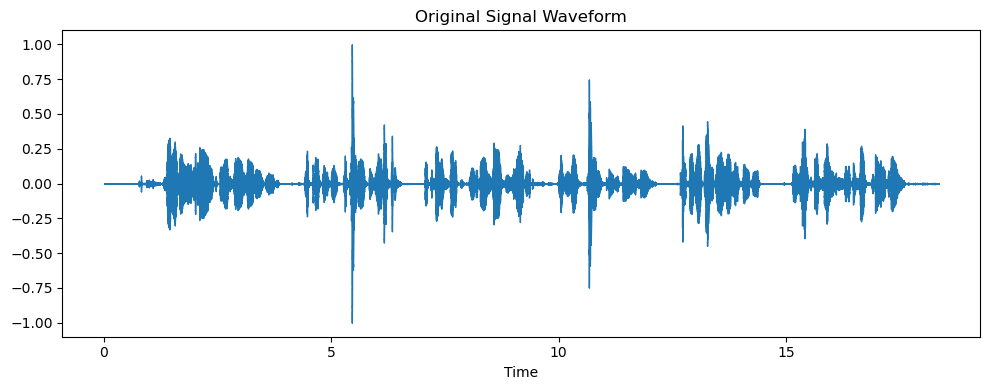

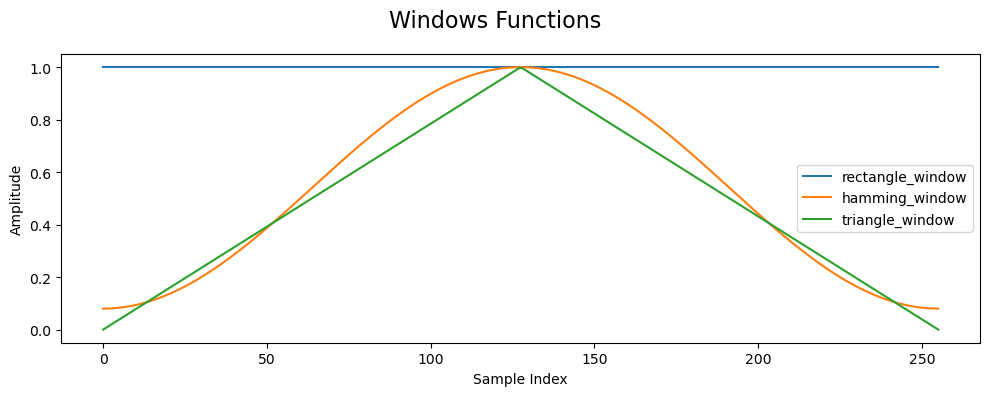

In [20]:
# speech example can be found here 
# https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download

# Load or generate a signal
filename = "harvard.wav"
signal, sample_rate = librosa.load(filename)

# Plot the original waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Original Signal Waveform")
plt.tight_layout()
plt.show()

window_funcs = [rectangle_window, hamming_window, triangle_window]
window_names = ["rectangle_window", "hamming_window", "triangle_window"]
window_size = 256
hop_length = 32


# Plot the window functions
plt.figure(figsize=(10, 4))
for i, (window_func, window_name) in enumerate(zip(window_funcs, window_names)):
    window = window_func(window_size)
    plt.plot(window, label=window_name)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.suptitle("Windows Functions", fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()

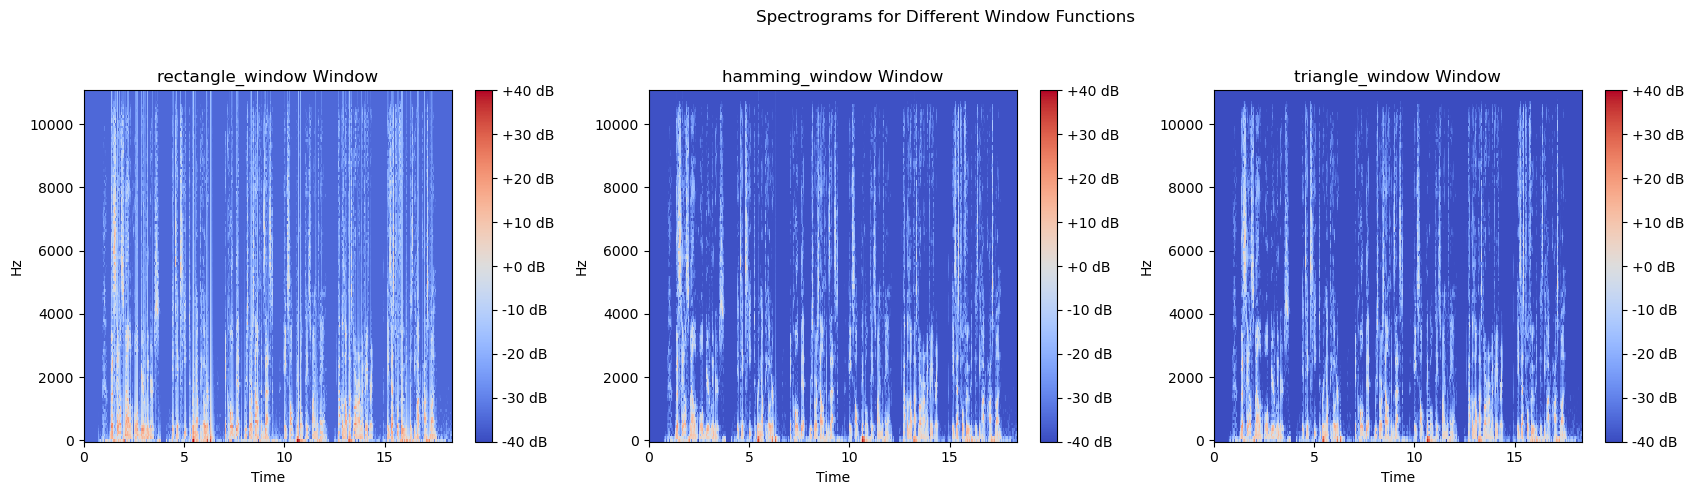

In [21]:
# Group STFT results for different windows in subplots
fig, axes = plt.subplots(1, 3, figsize=(19, 5))
for ax, window_func, window_name in zip(axes, window_funcs, window_names):
    stft_matrix = stft_custom(signal, window_func, window_size, hop_length)
    magnitude_spectrogram = np.abs(stft_matrix)
    log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
    
    img = librosa.display.specshow(
        log_spectrogram, sr=sample_rate, hop_length=hop_length, 
        x_axis="time", y_axis="linear", ax=ax, vmin=-40, vmax=40
    )
    ax.set_title(f"{window_name} Window")
    plt.colorbar(img, ax=ax, format="%+2.0f dB", location="right")

plt.suptitle("Spectrograms for Different Window Functions")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

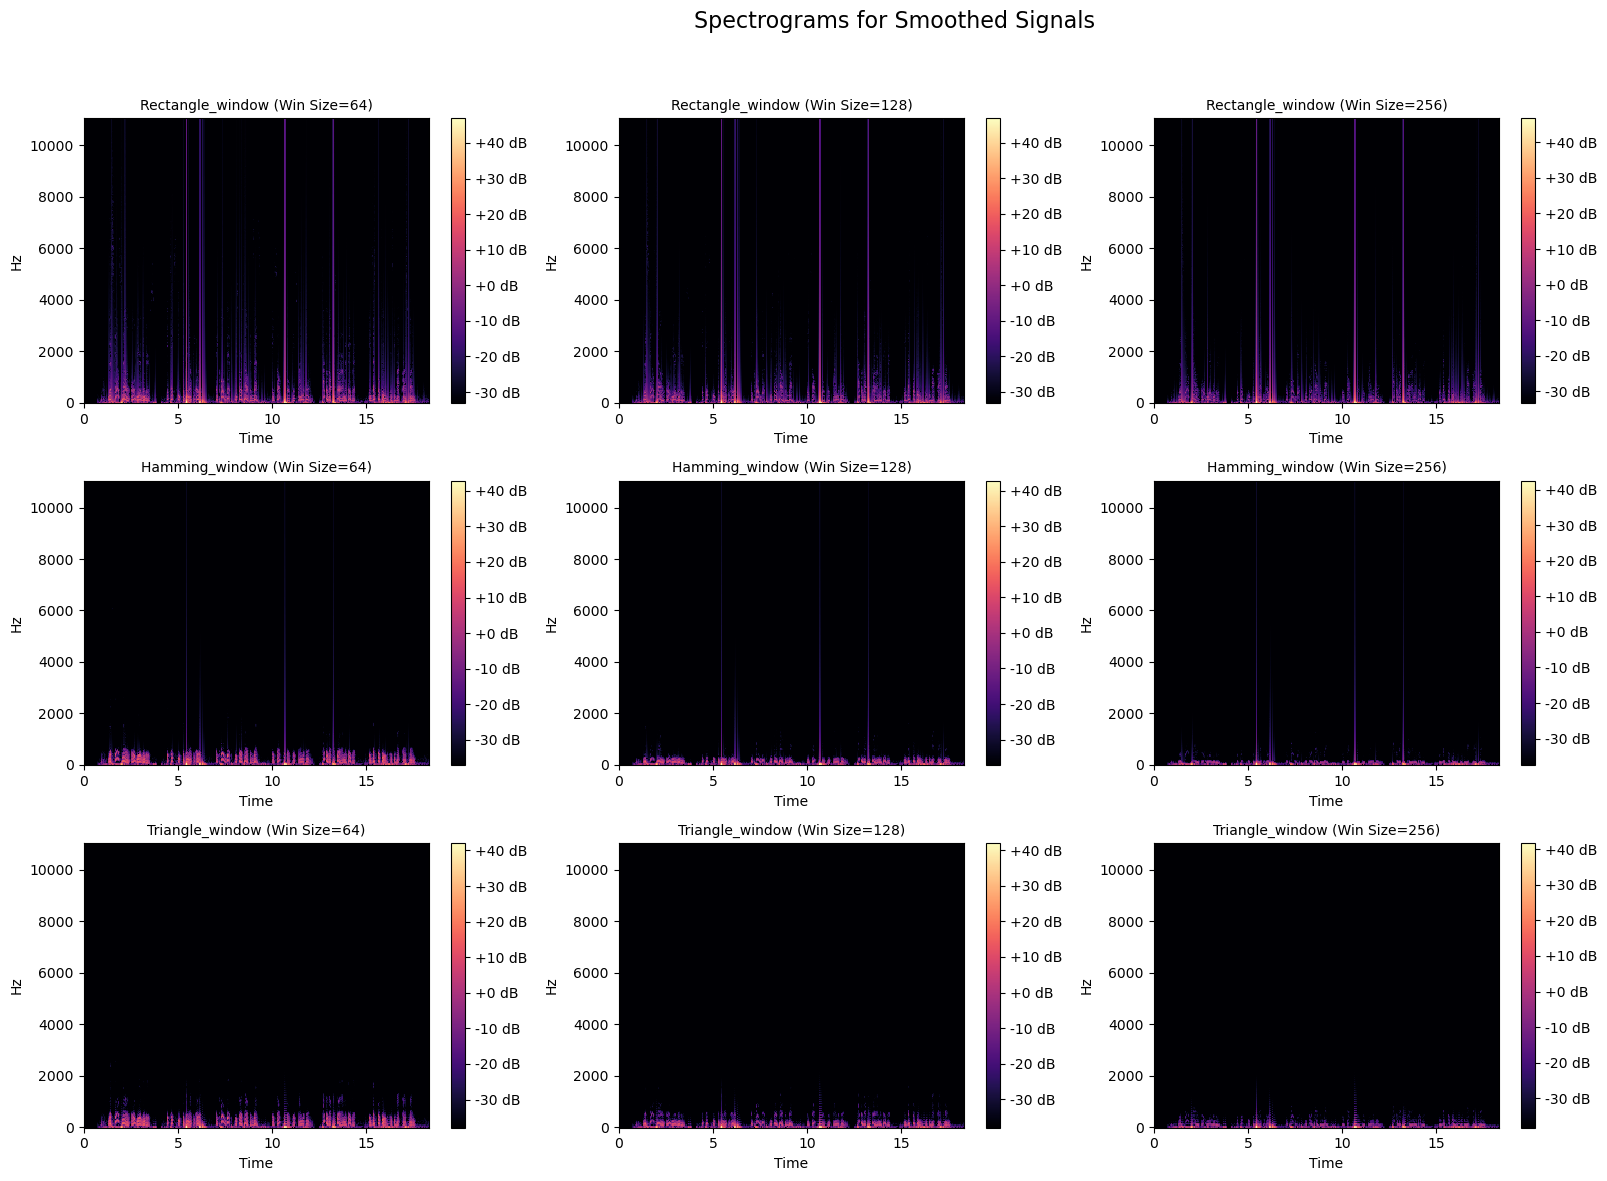

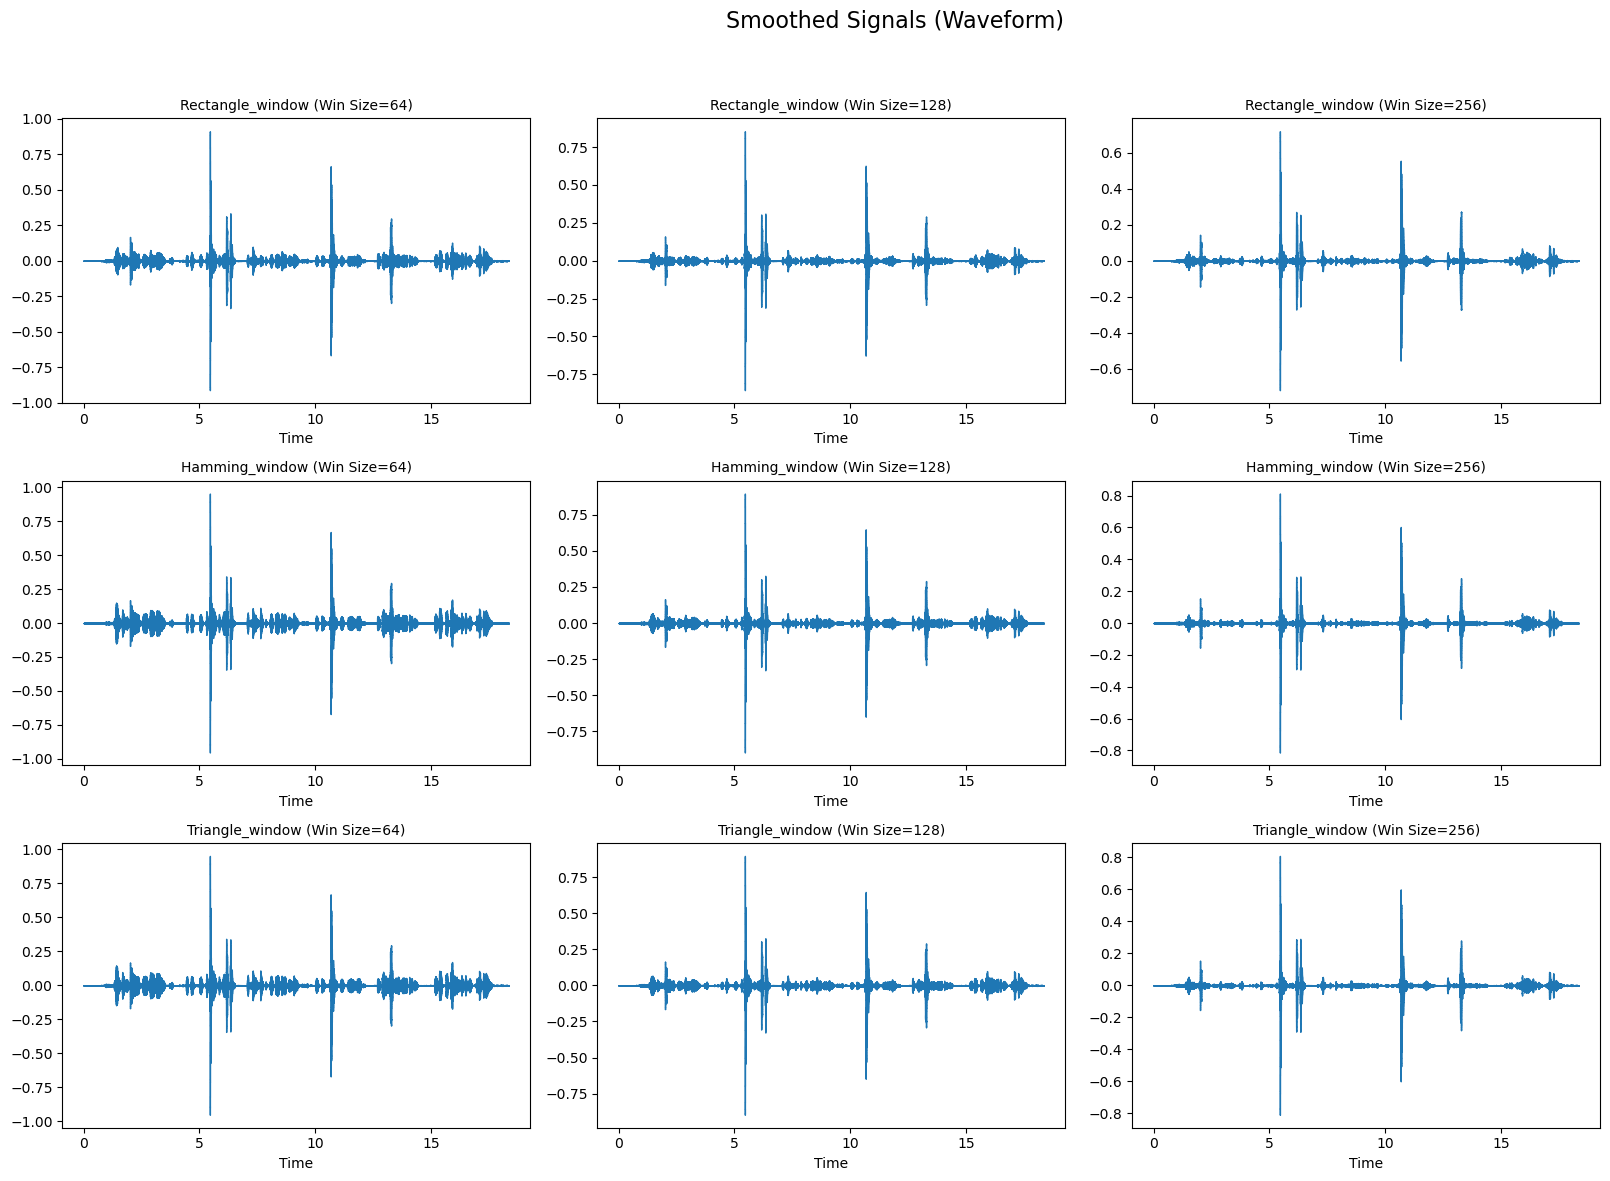

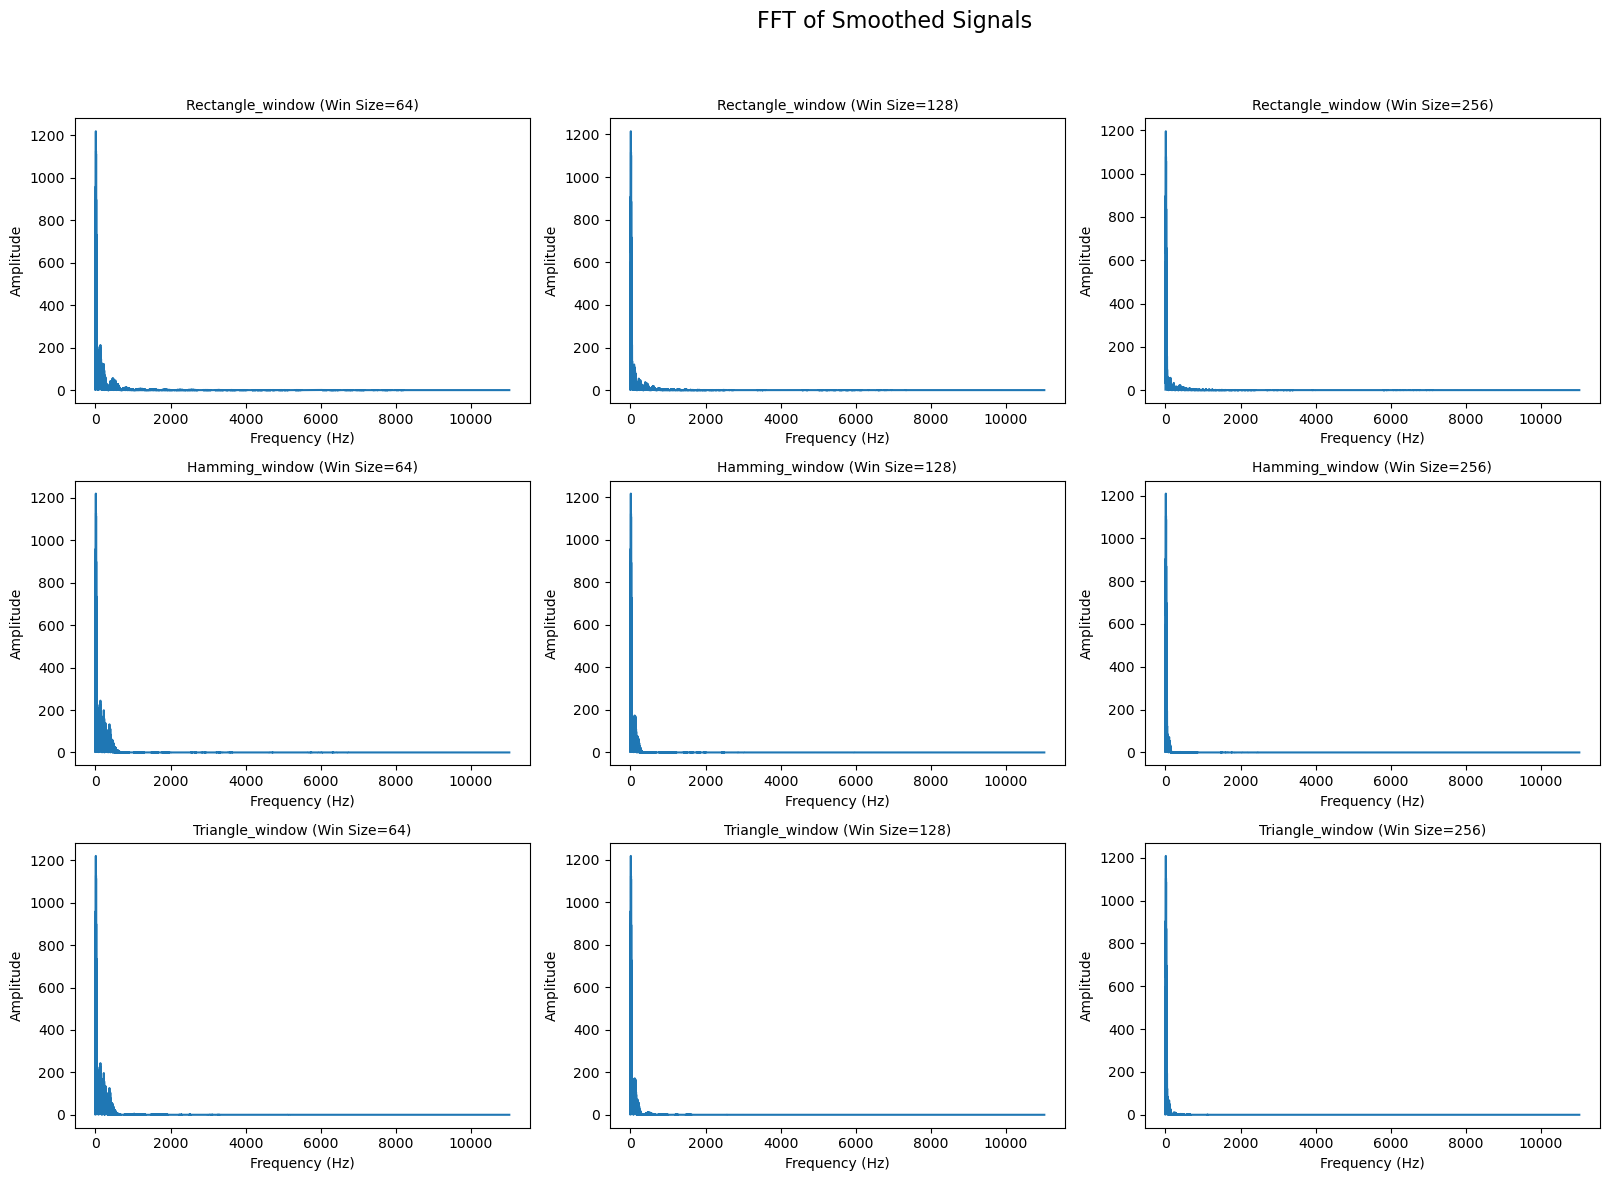

In [ ]:

# Define window sizes for smoothing
window_sizes = [64, 128, 256]

# 3x3 grid for spectrograms of smoothed signals
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for row, window_func in enumerate(window_funcs):
    for col, ws in enumerate(window_sizes):

        smoothed_signal = smooth_signal(signal, window_func, ws, hop_length)
        stft_matrix = stft_custom(smoothed_signal, window_func, window_size, hop_length)
        magnitude_spectrogram = np.abs(stft_matrix)
        log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
        
        img = librosa.display.specshow(
            log_spectrogram, sr=sample_rate, hop_length=hop_length, 
            x_axis="time", y_axis="linear", ax=axes[row, col]
        )
        axes[row, col].set_title(
            f"{window_func.__name__.capitalize()} (Win Size={ws})", fontsize=10
        )
        plt.colorbar(img, ax=axes[row, col], format="%+2.0f dB", location="right")

fig.suptitle("Spectrograms for Smoothed Signals", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()




# 3x3 grid for smoothed signals (waveform)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for row, window_func in enumerate(window_funcs):
    for col, ws in enumerate(window_sizes):

        smoothed_signal = smooth_signal(signal, window_func, ws, hop_length)
        librosa.display.waveshow(smoothed_signal, sr=sample_rate, ax=axes[row, col])
        axes[row, col].set_title(
            f"{window_func.__name__.capitalize()} (Win Size={ws})", fontsize=10
        )

fig.suptitle("Smoothed Signals (Waveform)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()



# 3x3 grid for FFTs of smoothed signals
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for row, window_func in enumerate(window_funcs):
    for col, ws in enumerate(window_sizes):

        smoothed_signal = smooth_signal(signal, window_func, ws, hop_length)
        fft_spectrum = np.fft.rfft(smoothed_signal)
        freqs = np.fft.rfftfreq(len(smoothed_signal), d=1/sample_rate)
        
        axes[row, col].plot(freqs, np.abs(fft_spectrum))
        axes[row, col].set_title(
            f"{window_func.__name__.capitalize()} (Win Size={ws})", fontsize=10
        )
        axes[row, col].set_xlabel("Frequency (Hz)")
        axes[row, col].set_ylabel("Amplitude")

fig.suptitle("FFT of Smoothed Signals", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


Vypadá to, že délka okna má vliv na zachicení detailů v časové doméně menší je lepší, ale za cenu menšího rezlišení frekvenčního spektra. Vypadá to, že s malým oknem je šum v signálu vyšší.

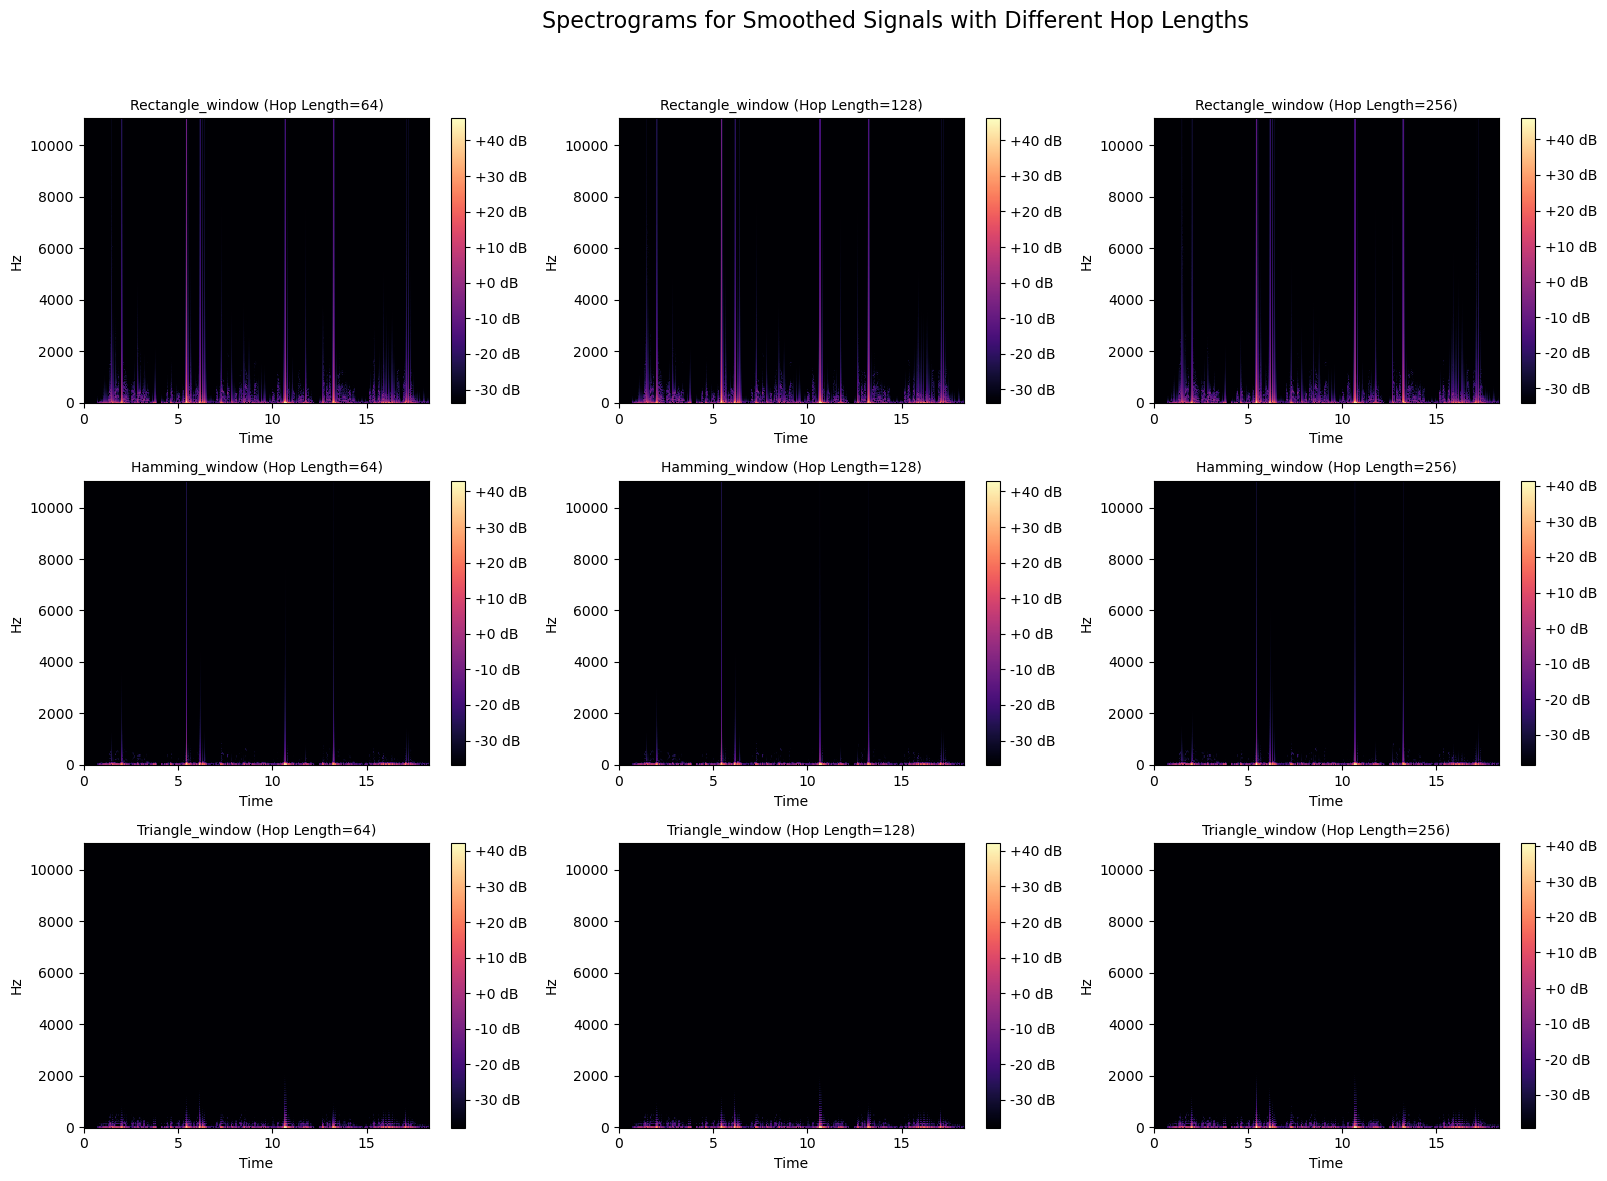

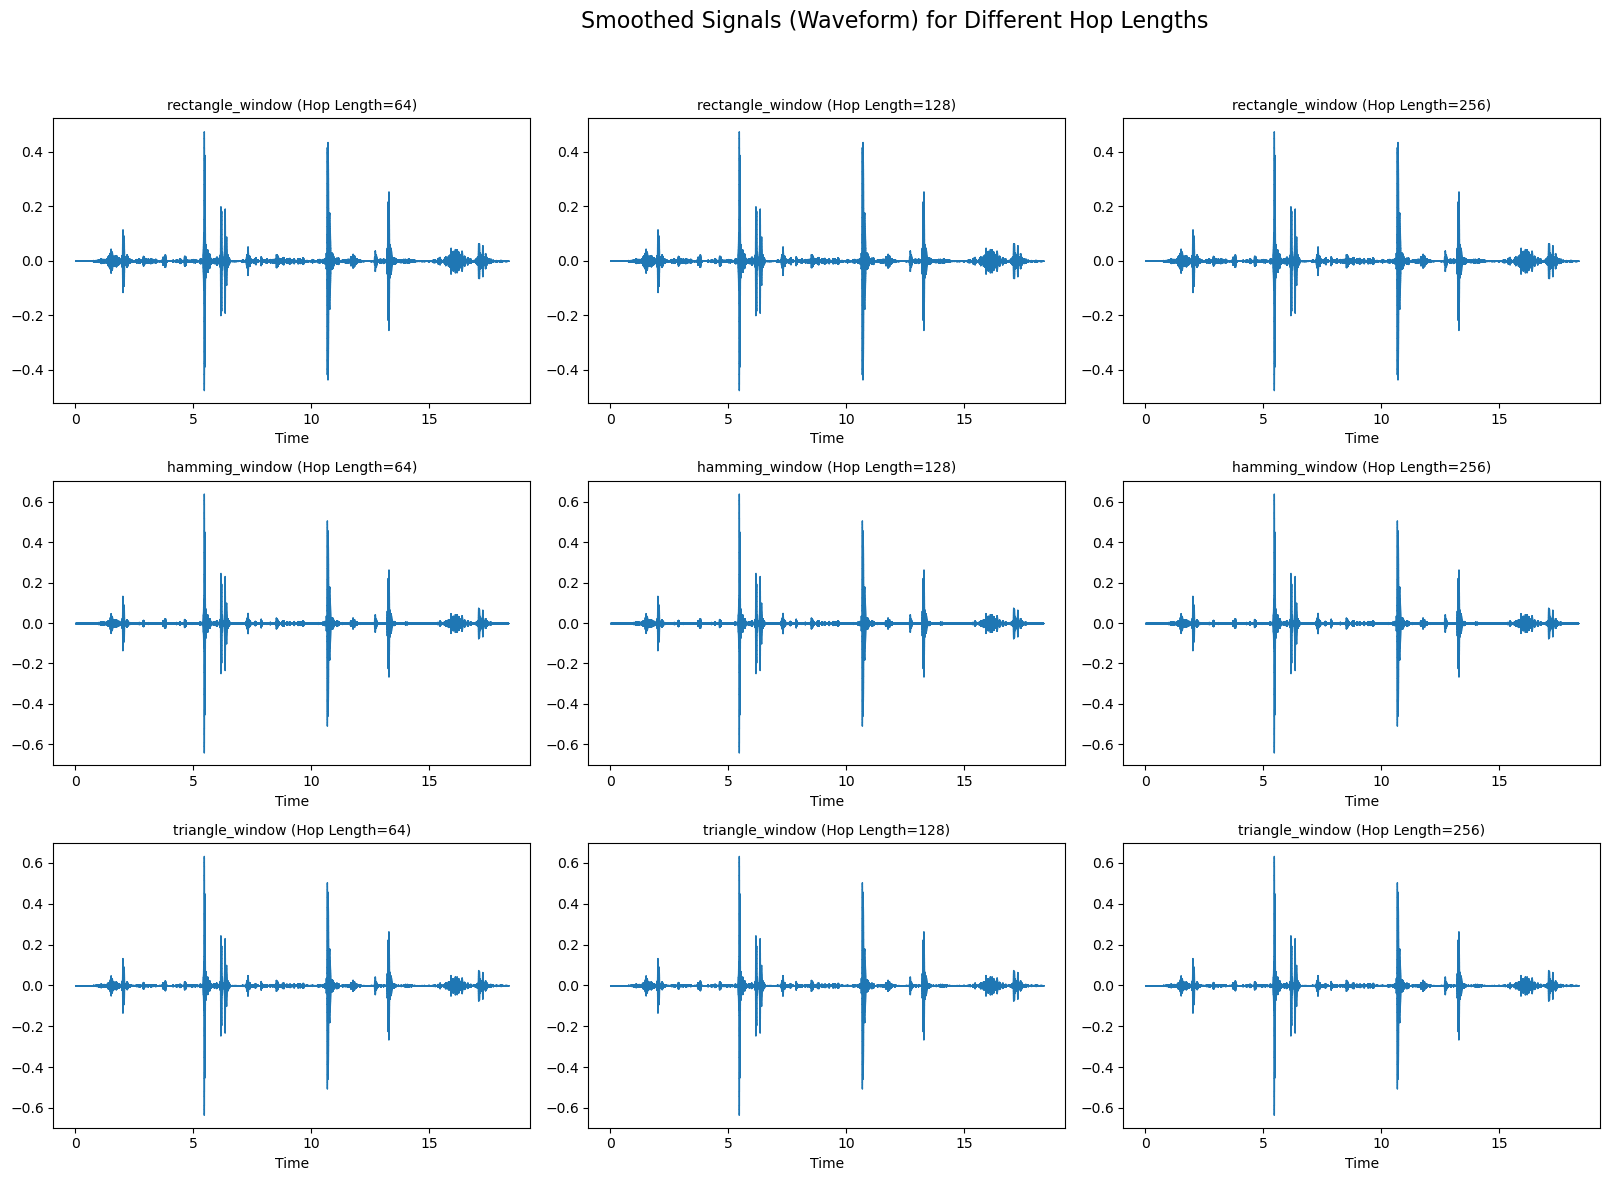

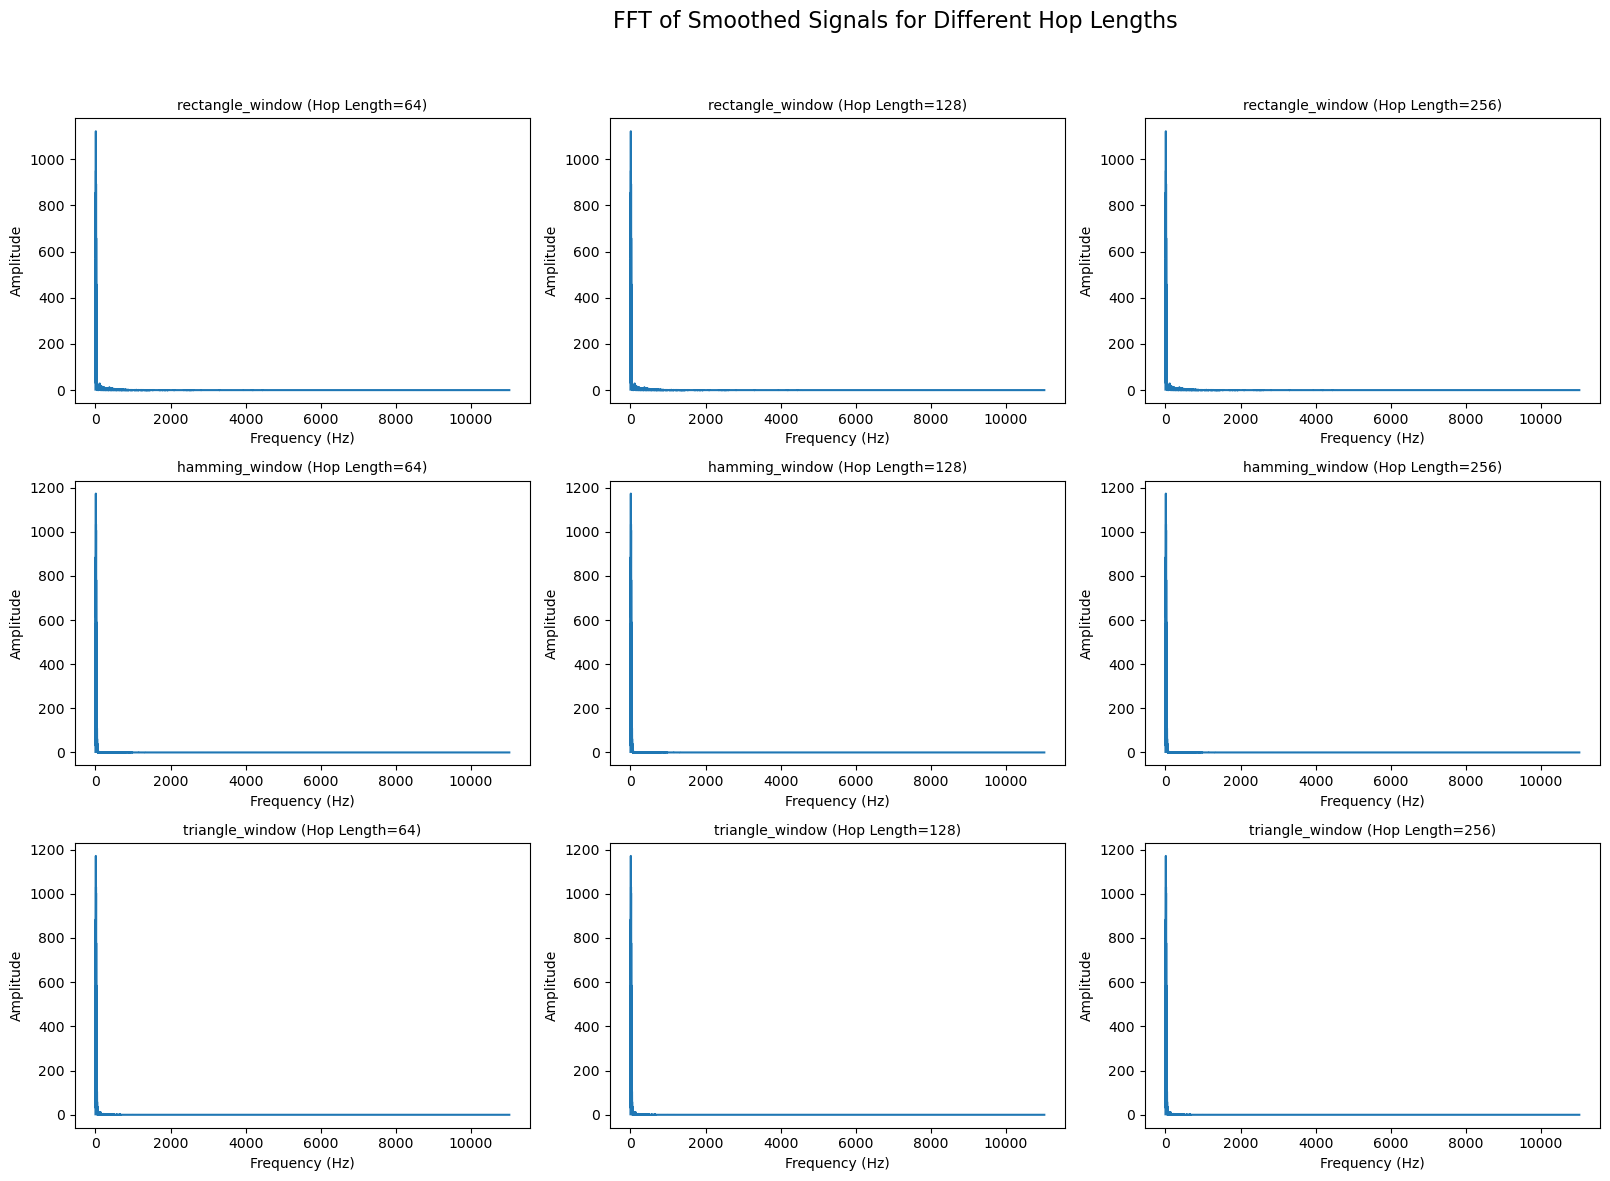

In [ ]:
hop_lengths = [64, 128, 256]

# 3x3 grid for spectrograms of smoothed signals with different hop lengths
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for row, window_func in enumerate(window_funcs):
    for col, hop_len in enumerate(hop_lengths):
        
        smoothed_signal = smooth_signal(signal, window_func, window_size, hop_len)
        stft_matrix = stft_custom(smoothed_signal, window_func, window_size, hop_len)
        magnitude_spectrogram = np.abs(stft_matrix)
        log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
        
        
        img = librosa.display.specshow(
            log_spectrogram, sr=sample_rate, hop_length=hop_len, 
            x_axis="time", y_axis="linear", ax=axes[row, col]
        )
        
        
        axes[row, col].set_title(
            f"{window_func.__name__.capitalize()} (Hop Length={hop_len})", fontsize=10
        )
        plt.colorbar(img, ax=axes[row, col], format="%+2.0f dB", location="right")


fig.suptitle("Spectrograms for Smoothed Signals with Different Hop Lengths", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()



# 3x3 grid for smoothed signals with different hop lengths
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for i, window_func in enumerate(window_funcs):
    for j, hop_length in enumerate(hop_lengths):

        smoothed_signal = smooth_signal(signal, window_func, window_size, hop_length)
        librosa.display.waveshow(smoothed_signal, sr=sample_rate, ax=axes[i, j])
        axes[i, j].set_title(f"{window_names[i]} (Hop Length={hop_length})", fontsize=10)

fig.suptitle("Smoothed Signals (Waveform) for Different Hop Lengths", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# 3x3 grid for FFTs of smoothed signals with different hop lengths
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for i, window_func in enumerate(window_funcs):
    for j, hop_length in enumerate(hop_lengths):

        smoothed_signal = smooth_signal(signal, window_func, window_size, hop_length)
        fft_spectrum = np.fft.rfft(smoothed_signal)
        freqs = np.fft.rfftfreq(len(smoothed_signal), d=1/sample_rate)
        
        axes[i, j].plot(freqs, np.abs(fft_spectrum))
        axes[i, j].set_title(f"{window_names[i]} (Hop Length={hop_length})", fontsize=10)
        axes[i, j].set_xlabel("Frequency (Hz)")
        axes[i, j].set_ylabel("Amplitude")

fig.suptitle("FFT of Smoothed Signals for Different Hop Lengths", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

Vpadá to, že délka skoku má vliv na vyšší rozlišení v časové doméně.

In [34]:
# Generalized STFT with arbitrary stride
def stft_general(signal, window_func, window_size, stride):
    n_frames = 1 + (len(signal) - window_size) // stride
    stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

    for i in range(n_frames):
        frame = signal[i * stride: i * stride + window_size]
        if len(frame) < window_size:  
            frame = np.pad(frame, (0, window_size - len(frame)))
        windowed_frame = frame * window_func(window_size)
        stft_matrix[:, i] = np.fft.rfft(windowed_frame)

    time_steps = np.linspace(0, len(signal), n_frames)
    full_time_steps = np.arange(len(signal))
    interpolated_matrix = np.empty((stft_matrix.shape[0], len(signal)), dtype=complex)

    for f in range(stft_matrix.shape[0]):
        interpolated_matrix[f, :] = np.interp(full_time_steps, time_steps, stft_matrix[f, :])

    return interpolated_matrix


In [ ]:
# Spectrogram function using STFT
def plot_spectrogram(sft, signal, window_func, window_size, stride, sample_rate):

    stft_matrix = sft(signal, window_func, window_size, stride)
    magnitude_spectrogram = np.abs(stft_matrix)
    log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)

    plt.figure(figsize=(12, 6))
    img = librosa.display.specshow(
        log_spectrogram, sr=sample_rate, hop_length=stride, 
        x_axis='time', y_axis='log', cmap='inferno'
    )
    plt.colorbar(img, format="%+2.0f dB")
    plt.title(f"Spectrogram (Window Size: {window_size}, Stride: {stride})")
    plt.tight_layout()
    plt.show()

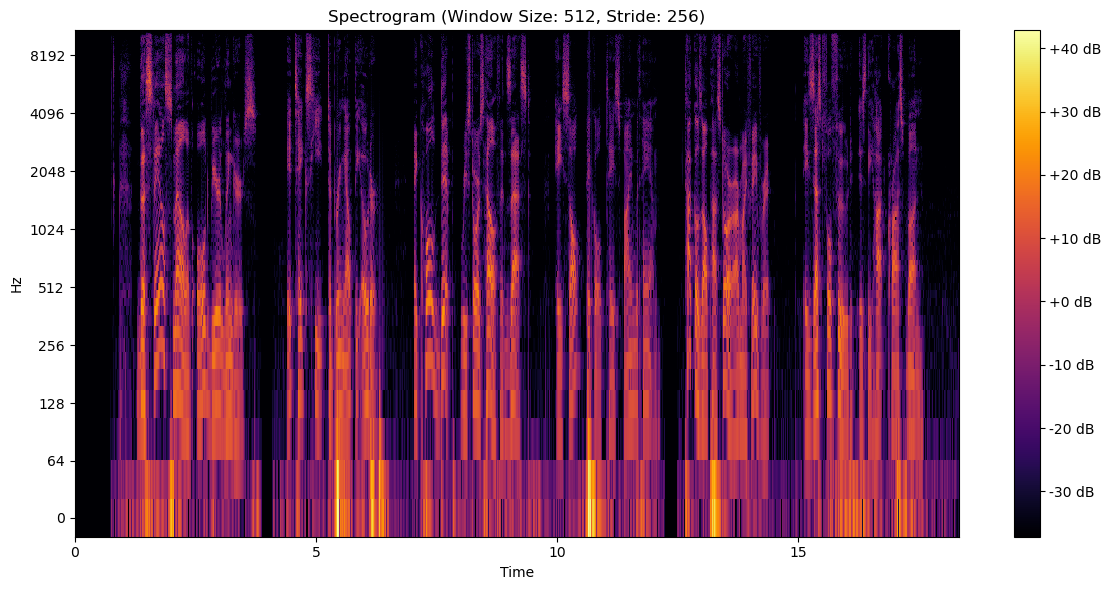

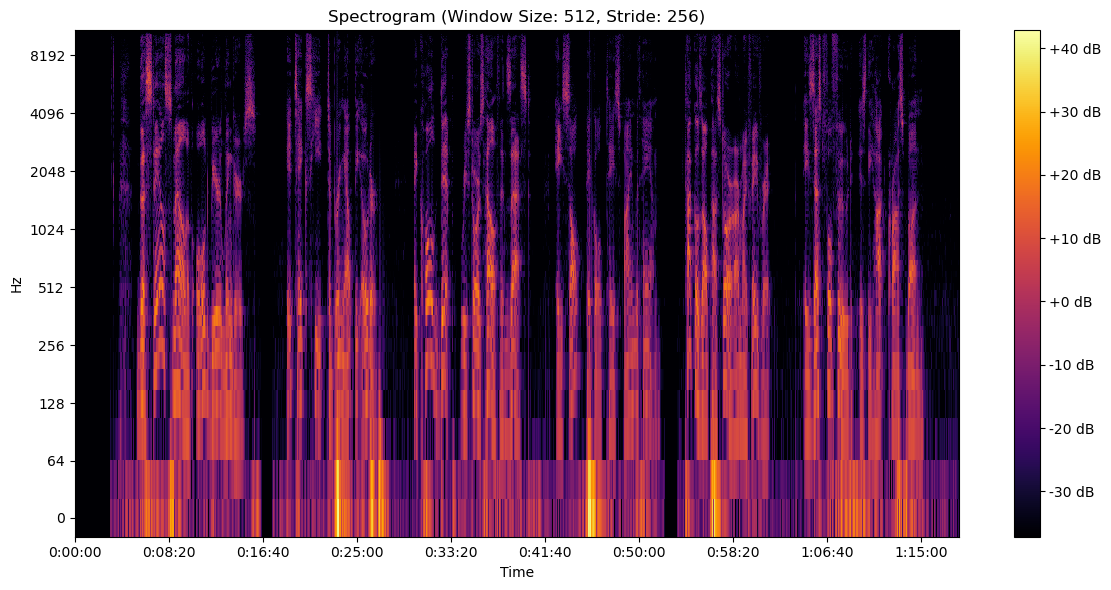

In [ ]:
window_size = 512
stride = 256
window_func = np.hamming

plot_spectrogram(stft_custom, signal, window_func, window_size, stride, sample_rate)
plot_spectrogram(stft_general, signal, window_func, window_size, stride, sample_rate)